In [2]:
from matplotlib import pyplot as plt
from scipy import stats
import numpy as np
import pandas as pd
from pathlib import Path

In [3]:
file_path = Path("Resources/Budget/Budget_by_County_Merged.csv")

df = pd.read_csv(file_path)

df.head()

,State,County/ Congressional District,Veteran Population*,Total Expenditure,Compensation & Pension,Construction,Education & Vocational Rehabilitation/ Employment,Loan Guaranty#,General Operating Expenses,Insurance & Indemnities,Medical Care,Unique Patients**,Year
0,Alaska,ALEUTIANS EAST,179,126,28,0,0,0,0,0,97,9,2010
1,Alaska,ALEUTIANS WEST,387,179,122,0,8,0,0,0,49,24,2010
2,Alaska,ANCHORAGE,31274,190835,81093,13678,19025,0,6550,1487,69002,7718,2010
3,Alaska,BETHEL,1228,731,396,0,37,0,0,0,298,61,2010
4,Alaska,BRISTOL BAY,170,311,190,0,0,0,0,9,112,23,2010


In [6]:
df = df.rename(columns={"County/ Congressional District": "County",
                       "Veteran Population*": "Veteran Population",
                       "Loan Guaranty#": "Loan Guaranty"})

In [5]:
df = df.drop(["Unique Patients**"], axis=1)

df.head()

,State,County,Veteran Population,Total Expenditure,Compensation & Pension,Construction,Education & Vocational Rehabilitation/ Employment,Loan Guaranty,General Operating Expenses,Insurance & Indemnities,Medical Care,Year
0,Alaska,ALEUTIANS EAST,179,126,28,0,0,0,0,0,97,2010
1,Alaska,ALEUTIANS WEST,387,179,122,0,8,0,0,0,49,2010
2,Alaska,ANCHORAGE,31274,190835,81093,13678,19025,0,6550,1487,69002,2010
3,Alaska,BETHEL,1228,731,396,0,37,0,0,0,298,2010
4,Alaska,BRISTOL BAY,170,311,190,0,0,0,0,9,112,2010


In [7]:
san_diego = df.loc[df["County"] == "SAN DIEGO"]

san_diego

,State,County,Veteran Population,Total Expenditure,Compensation & Pension,Construction,Education & Vocational Rehabilitation/ Employment,Loan Guaranty,General Operating Expenses,Insurance & Indemnities,Medical Care,Year
222,California,SAN DIEGO,234959,1437610,627730,7264,291780,0,50259,23530,437047,2010
3258,California,SAN DIEGO,228526,1755045,778958,36062,430735,0,57657,23136,428497,2011
6666,California,SAN DIEGO,226852,1687511,687540,6959,429945,0,62339,23906,476823,2012
9888,California,SAN DIEGO,224881,2028580,843900,5965,487024,0,65337,21727,604626,2013
13109,California,SAN DIEGO,227463,2383793,1055348,22068,508150,0,73522,21564,703141,2015


C:\Users\nicdu\AppData\Local\Temp\ipykernel_25544\3148926970.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


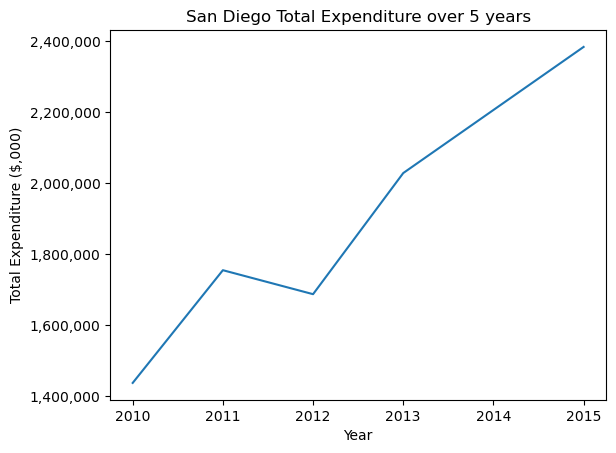

In [16]:
expenditure_over_years = plt.plot(san_diego['Year'], san_diego['Total Expenditure'])

plt.title("San Diego Total Expenditure over 5 years")
plt.xlabel("Year")
plt.ylabel("Total Expenditure ($,000)")
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

plt.show()





In [73]:
#plotting top 10 expense by county over year.

# Finding top ten
df_expend_sum = df.groupby(["State", "County"])["Total Expenditure"].sum().sort_values(ascending=False)
df_expend_sum = df_expend_sum.head(10)

# Assign state/county to list
df_expend_sum =  [f"{key[1]}, {key[0]}" for key in df_expend_sum.keys()]



# Create a pivot table dataframe with top 10 counties
pivoted = df.loc[[f"{row[1]['County']}, {row[1]['State']}" in df_expend_sum for row in df.iterrows()],
                 ["County", "State", "Total Expenditure", "Year"]]

#merge county and state into one column
pivoted['County'] = pivoted['County'] + ', ' + pivoted['State']

pivoted = pivoted.pivot(index="Year", columns="County", values="Total Expenditure")

pivoted


County,"BEXAR, Texas","CLARK, Nevada","COOK, Illinois","CUYAHOGA, Ohio","DISTRICT OF COLUMBIA, District of Columbia","HARRIS, Texas","LOS ANGELES, California","MARICOPA, Arizona","SAN DIEGO, California","TRAVIS, Texas"
Year,,,,,,,,,,
2010,1200895,884665,1135962,2308568,1940233,910513,1640877,1173230,1437610,1088019
2011,1482381,890485,1134721,2446675,2242043,1028968,1757027,1343221,1755045,1725119
2012,1330251,873693,1151572,2546650,2099018,1043887,1810193,1338616,1687511,1892928
2013,1573026,1051792,1362173,2763705,2295599,1258362,2258286,1592681,2028580,1759581
2015,1920711,1249043,1488349,3256434,2960157,1554841,2644554,1864213,2383793,1284400


C:\Users\nicdu\AppData\Local\Temp\ipykernel_25544\537895639.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


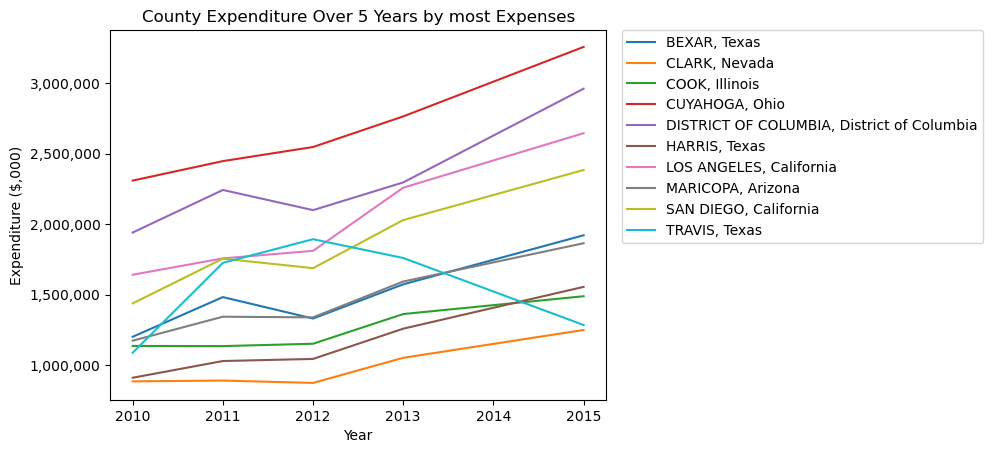

In [74]:
#plot
ax = pivoted.plot(legend=False)
ax.figure.legend(loc="upper right", bbox_to_anchor=(1.5,0.895))
ax.set_ylabel("Expenditure ($,000)")
ax.set_title("County Expenditure Over 5 Years by most Expenses")
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.show()